<h3>Dataset and Preprocessing :</h3>
<br></br>
<p>The dataset is loaded and seperated into categories then added to Train_data array as grayscale.</p>

In [1]:
import os
import numpy as np
import random
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm

# List categories in the train directory
DATA_PATH = r"G:\Uni stuff\SEM10 (fall 23)\01651 - COMPUTER VISION AND PATTERN RECOGNITION [A]\code\CIFAR-10-images-master\CIFAR-10-images-master\train"
Train_data = []
Categories = os.listdir(DATA_PATH)
Categories

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [2]:
#for c in Categories:
   # path = os.path.join(DATA_PATH,c)
    #for img in tqdm(os.listdir(path)):
        #print(img)
        #img_arr = cv2.imread(os.path.join(path,img))
        
for c in Categories:
    path = os.path.join(DATA_PATH, c)
    print(f"Category: {c}")
    image_paths = os.listdir(path)
    image_paths = image_paths[:500] #limit to 500 to speed up training, it takes nearly 2 hours with 5000 imgs per category
    for img in tqdm(image_paths):
        img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        Train_data.append((img_arr, Categories.index(c)))
    print("\n")  
        

Category: airplane


100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 7136.35it/s]




Category: automobile


100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 7136.37it/s]




Category: bird


100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 7136.35it/s]




Category: cat


100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 7136.35it/s]




Category: deer


100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 7346.34it/s]




Category: dog


100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 7239.75it/s]




Category: frog


100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 7239.77it/s]




Category: horse


100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 7346.26it/s]




Category: ship


100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 6487.61it/s]




Category: truck


100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 7346.26it/s]


<h5>We then print the first img in each category :</h5>

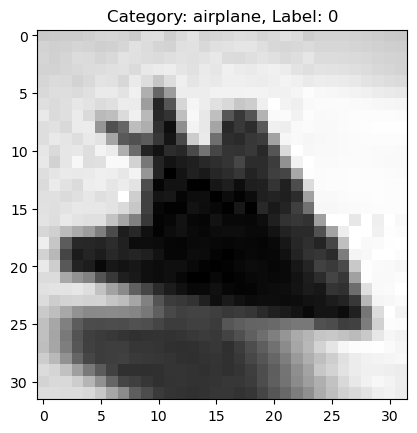

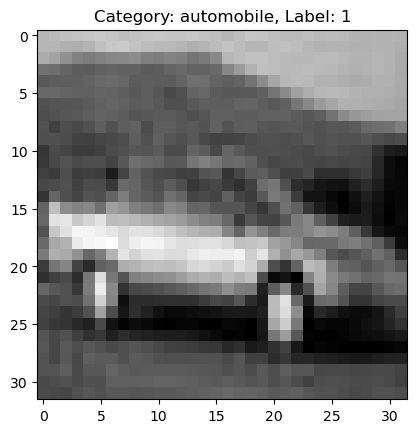

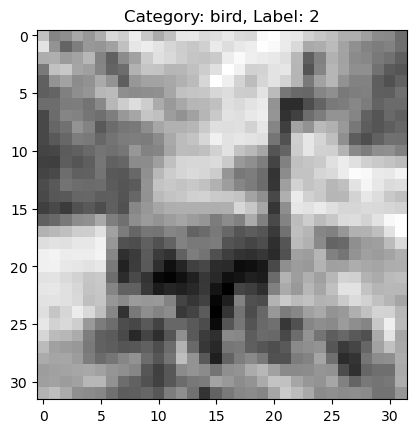

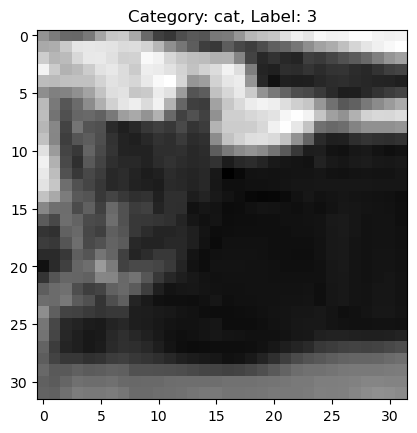

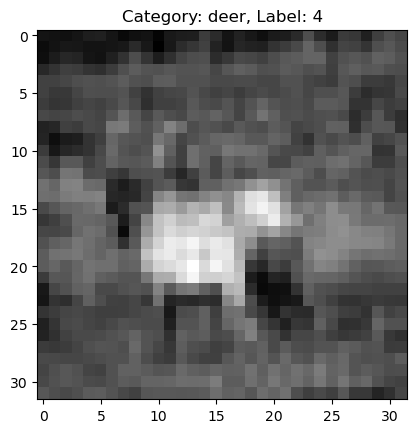

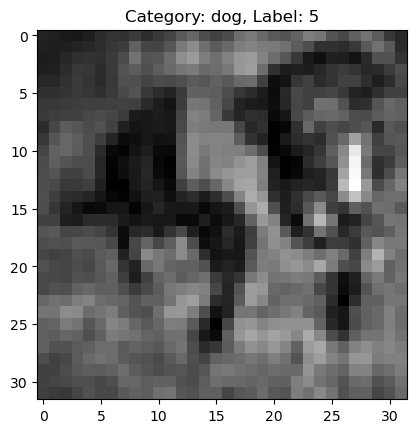

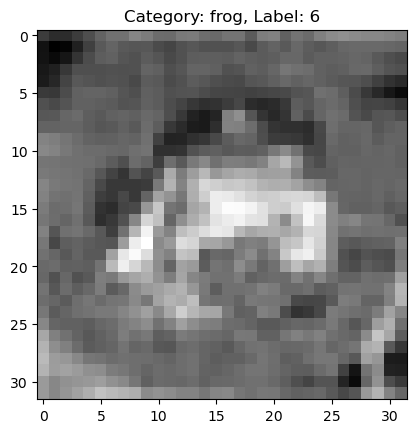

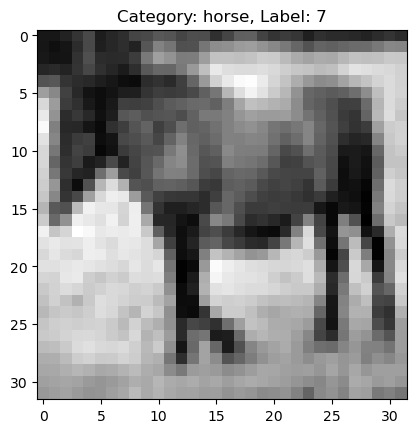

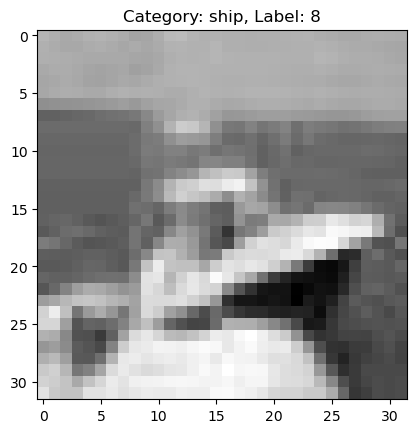

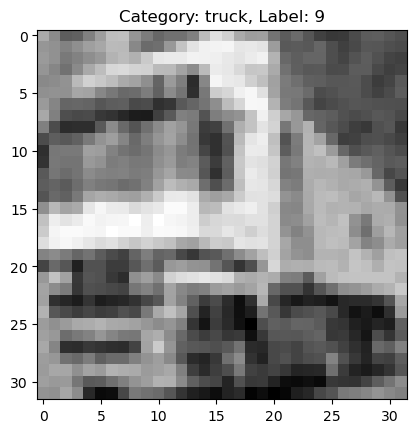

In [3]:
#print first in each caregory
for c in Categories:
    images_in_category = [item for item in Train_data if item[1] == Categories.index(c)]
    if images_in_category:
        first_image, label = images_in_category[0]
        plt.imshow(first_image, cmap='gray')
        plt.title(f"Category: {c}, Label: {label}")
        plt.show()

<h3>Model Building and Evaluation:</h3>
<br>
<p>To classify the gray-scale CIFAR-10 images,  the k-nearest neighbors (k-NN) algorithm is employed. Two distance metrics, Manhattan (L1) and Euclidean (L2), to measure the similarity between images are used.</p>
<br>
<p>To vary the number of neighbors a 'k_values' array is defined and the number of neighbors can be adjusted if necessary, the k values were chosen arbitrarily. The number of folds was set to 5 and shuffle was set to TRUE to randomly shuffle and distributehe data points across the folds, this helps prevent any unintentional ordering or bias in the data from affecting the cross-validation results. The random seed for this was set to 42 to make the suffling reporoducable, this was also arbitrary any number could be chosen.</p>

In [4]:
#print(np.array(Train_data).shape)
#Train_data
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k_values = [1, 3, 5, 7, 9]  # Adjust the range of K values if needed
accuracy_manhattan_list = []
accuracy_euclidean_list = []

X = np.array([item[0].flatten() for item in Train_data])
y = np.array([item[1] for item in Train_data])

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in tqdm(kf.split(X), total=5):
    X_train, X_test = [X[i] for i in train_index], [X[i] for i in test_index]
    y_train, y_test = [y[i] for i in train_index], [y[i] for i in test_index]

    accuracy_manhattan_fold = []
    accuracy_euclidean_fold = []

    for k in k_values:
        knn_manhattan = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
        knn_euclidean = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

        knn_manhattan.fit(X_train, y_train)
        knn_euclidean.fit(X_train, y_train)

        y_pred_manhattan = knn_manhattan.predict(X_test)
        y_pred_euclidean = knn_euclidean.predict(X_test)

        accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)
        accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)

        accuracy_manhattan_fold.append(accuracy_manhattan)
        accuracy_euclidean_fold.append(accuracy_euclidean)

    accuracy_manhattan_list.append(accuracy_manhattan_fold)
    accuracy_euclidean_list.append(accuracy_euclidean_fold)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:02<00:00, 12.46s/it]


<h3>Results and Analysis :</h3>
<br>
<p>Next, a graph with K on the X-axis and accuracy on the Y-axis for both the Manhattan (L1) and Euclidean (L2) distances is plotted. 
This graph will allow us to visualize the impact of different values of K on the model's accuracy for each distance calculation technique.</p>

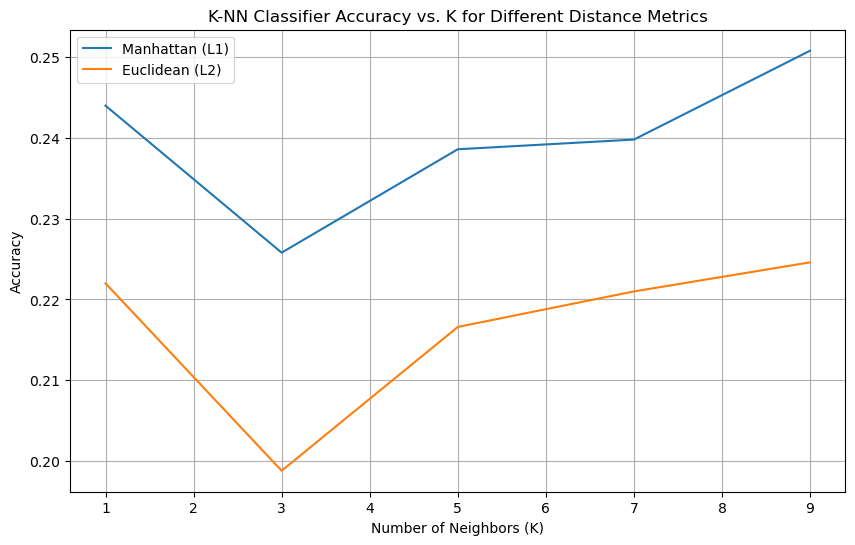

In [42]:
# Calculate average accuracy for each K and each distance metric
avg_accuracy_manhattan = [sum([fold[k] for fold in accuracy_manhattan_list]) / 5 for k in range(len(k_values))]
avg_accuracy_euclidean = [sum([fold[k] for fold in accuracy_euclidean_list]) / 5 for k in range(len(k_values))]

# Plot the accuracy graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, avg_accuracy_manhattan, label='Manhattan (L1)')
plt.plot(k_values, avg_accuracy_euclidean, label='Euclidean (L2)')
plt.title('K-NN Classifier Accuracy vs. K for Different Distance Metrics')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

<h3>Discussion :</h3>
    <p>Based on the graph , it appears that the Manhattan (L1) distance metric outperforms the Euclidean (L2) distance metric for this grayscale dataset. This may be due to the nature of the features and the complexity of the classes in the CIFAR-10 dataset. Additionally, the dataset’s characteristics, such as the size and distribution of the data, may also play a role in determining which distance calculation technique is better suited for this specific dataset. Potential improvements that could be made to enhance the classification accuracy include increasing the size of the training dataset and fine-tuning the model’s hyperparameters.</p>
   <br>
   <p>Training using the whole Dataset will all 50,000 imgs results in the same graph shape, the graph is translated upwards by 0.05 on the y-axis meaning a 5% increase in perrformance, during training the taining set was varied by 100 images per category all the way up to all 5000 images, 500 was the lowest training time while keeping accuracy high, bayond 500 there are diminishing returns on accuracy with exponential increase in time requred to train. With all 5000 images maximum accuracy achived was 0.31 for L1 and 0.25 for L2 at 9 neghbors. All other values incresased by a similar ammount (about 0.05 as mentioned above).</p>
   

<h3>Top 5 Predictions :</h3>
    <p>Finally we load the test set and display the top 5 images based on the test set.</p>


In [43]:
TEST_DATA_PATH = r"G:\Uni stuff\SEM10 (fall 23)\01651 - COMPUTER VISION AND PATTERN RECOGNITION [A]\code\CIFAR-10-images-master\CIFAR-10-images-master\test"

Test_data = []

# List categories in the test directory
Test_Categories = os.listdir(TEST_DATA_PATH)

# Loop through each category
for c in Test_Categories:
    path = os.path.join(TEST_DATA_PATH, c)
    print(f"Category: {c}")
    
    image_paths = os.listdir(path)
    
    for img in tqdm(image_paths):
        img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        Test_data.append((img_arr, Test_Categories.index(c)))
                         


Category: airplane


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 7401.11it/s]


Category: automobile


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 7511.98it/s]


Category: bird


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 7568.88it/s]


Category: cat


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 7568.86it/s]


Category: deer


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 7511.95it/s]


Category: dog


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 7400.69it/s]


Category: frog


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 7511.98it/s]


Category: horse


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 7346.25it/s]


Category: ship


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 7400.65it/s]


Category: truck


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 7400.69it/s]


In [44]:
X_test = np.array([item[0].flatten() for item in Test_data])
y_test = np.array([item[1] for item in Test_data])

best_k_manhattan = 9
best_k_euclidean = 9

knn_manhattan = KNeighborsClassifier(n_neighbors=best_k_manhattan, metric='manhattan')
knn_euclidean = KNeighborsClassifier(n_neighbors=best_k_euclidean, metric='euclidean')

knn_manhattan.fit(X, y)
knn_euclidean.fit(X, y) 

y_pred_manhattan = []
y_pred_euclidean = []

# Predict on the test set while displaying a progress bar
for i in tqdm(range(250)): #len(X_test)) for full set, once again it takes a very long time for all 10000 imgs
    y_pred_manhattan.append(knn_manhattan.predict([X_test[i]]))
    y_pred_euclidean.append(knn_euclidean.predict([X_test[i]]))



def display_top_predictions(image_index):
    image = X_test[image_index].reshape(32, 32)  # Reshape to the original image size
    plt.imshow(image, cmap='gray')
    plt.title(f"Test Image - True Label: {Test_Categories[y_test[image_index]]}")
    plt.show()

    # Get top 5 predictions for Manhattan distance
    distances_manhattan, indices_manhattan = knn_manhattan.kneighbors([X_test[image_index]], n_neighbors=5)
    top_predictions_manhattan = y[indices_manhattan[0]]

    # Get top 5 predictions for Euclidean distance
    distances_euclidean, indices_euclidean = knn_euclidean.kneighbors([X_test[image_index]], n_neighbors=5)
    top_predictions_euclidean = y[indices_euclidean[0]]

    print("Top 5 Predictions for Manhattan Distance:")
    for i, label in enumerate(top_predictions_manhattan):
        prediction = Categories[label]
        is_correct = "Correct" if label == y_test[image_index] else "Incorrect"
        print(f"Prediction {i + 1}: {prediction} ({is_correct})")

    print("\nTop 5 Predictions for Euclidean Distance:")
    for i, label in enumerate(top_predictions_euclidean):
        prediction = Categories[label]
        is_correct = "Correct" if label == y_test[image_index] else "Incorrect"
        print(f"Prediction {i + 1}: {prediction} ({is_correct})")

    # Plot the images corresponding to the top 5 predictions for Manhattan distance
    plt.figure(figsize=(12, 6))
    plt.suptitle("Top 5 Predictions for Manhattan Distance")
    for i, label in enumerate(top_predictions_manhattan):
        img = X[label].reshape(32, 32)
        plt.subplot(1, 5, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"Prediction {i + 1}: {Categories[label]}")

    plt.show()

    # Plot the images corresponding to the top 5 predictions for Euclidean distance
    plt.figure(figsize=(12, 6))
    plt.suptitle("Top 5 Predictions for Euclidean Distance")
    for i, label in enumerate(top_predictions_euclidean):
        img = X[label].reshape(32, 32)
        plt.subplot(1, 5, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"Prediction {i + 1}: {Categories[label]}")

    plt.show()


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:11<00:00, 22.57it/s]


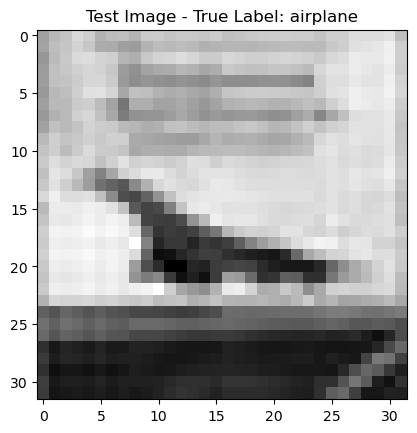

Top 5 Predictions for Manhattan Distance:
Prediction 1: ship (Incorrect)
Prediction 2: ship (Incorrect)
Prediction 3: airplane (Correct)
Prediction 4: ship (Incorrect)
Prediction 5: deer (Incorrect)

Top 5 Predictions for Euclidean Distance:
Prediction 1: ship (Incorrect)
Prediction 2: bird (Incorrect)
Prediction 3: ship (Incorrect)
Prediction 4: ship (Incorrect)
Prediction 5: airplane (Correct)


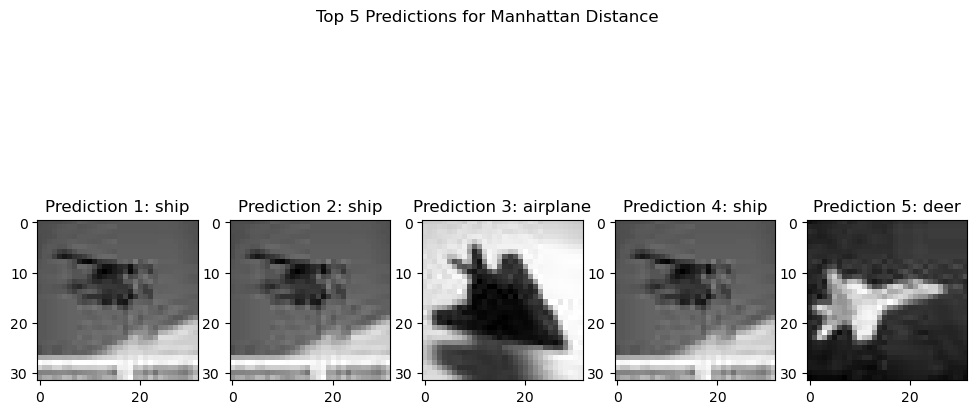

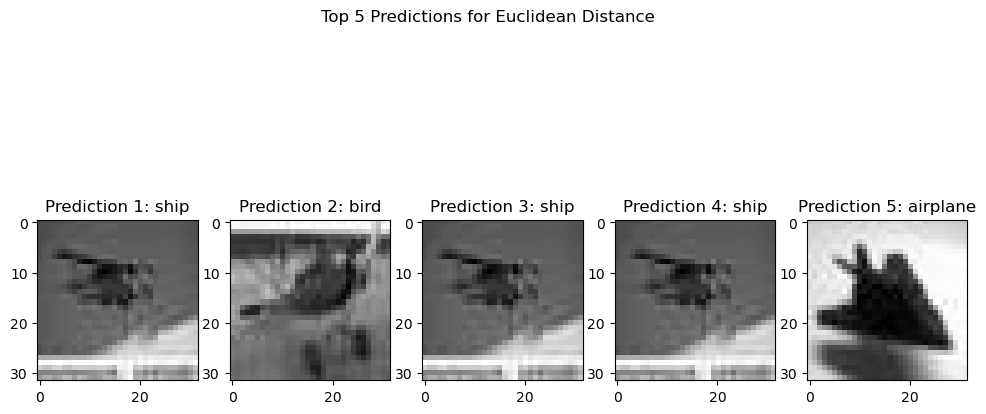

In [45]:
display_top_predictions(0)

<h3>Discussion (continued) :</h3>
<h6>   The actual accuracy :</h6>
<p>In order to get an idea of the reac accuracy of the kNN model, a furthur plot was made against the test set and a bar graph was plotted. The accuracy of the model is actually 10% for L1  and 8% for L2 with all 50,000 images + 10,000 for the test set, here 250 from the test are used and the 500 from the train set was used.</p>

100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:11<00:00, 22.55it/s]


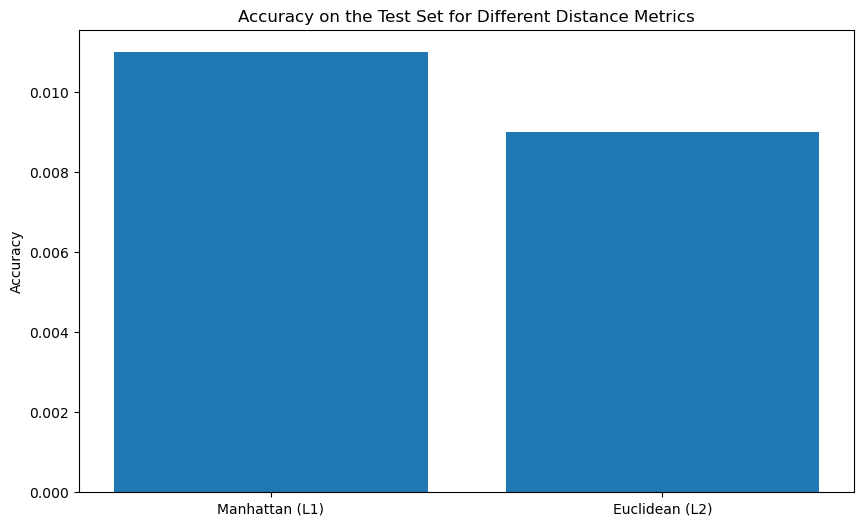

In [46]:
# Initializing variables to keep track of correct predictions
correct_manhattan = 0
correct_euclidean = 0

# Predict on the test set and check correctness
for i in tqdm(range(250)): #len(X_test)
    manhattan_pred = knn_manhattan.predict([X_test[i]])[0]
    euclidean_pred = knn_euclidean.predict([X_test[i]])[0]

    if manhattan_pred == y_test[i]:
        correct_manhattan += 1

    if euclidean_pred == y_test[i]:
        correct_euclidean += 1

# Calculate accuracy
accuracy_manhattan = correct_manhattan / len(X_test)
accuracy_euclidean = correct_euclidean / len(X_test)

# Plot the accuracy graph
plt.figure(figsize=(10, 6))
plt.bar(['Manhattan (L1)', 'Euclidean (L2)'], [accuracy_manhattan, accuracy_euclidean])
plt.title('Accuracy on the Test Set for Different Distance Metrics')
plt.ylabel('Accuracy')
plt.show()
